## Loading Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('/Users/claudia/Ironhack/Mid-Bootcamp Project/data_mid_bootcamp_project_regression/regression_data_clean.csv')

## Exploratory Data Analysis 

In [3]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [4]:
data.shape

(21597, 21)

In [5]:
data.info()  #there are No non-null values!!!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [6]:
#checking for null values

nulls = pd.DataFrame(data.isna().sum()/len(data))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
0,id,0.0
11,sqft_above,0.0
19,sqft_lot15,0.0
18,sqft_living15,0.0
17,long,0.0
16,lat,0.0
15,zipcode,0.0
14,yr_renovated,0.0
13,yr_built,0.0
12,sqft_basement,0.0


In [7]:
data.dtypes  
#I check the type of each field. The date field is object, we need to transform it into datetype

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [8]:
data['date']=pd.to_datetime(data['date'])   
#changing the date field in datetime type

In [9]:
data.nunique()  #there are duplicates in the IDs field!!

id               21420
date               372
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
price             3622
dtype: int64

In [10]:
data.query("id==795000620") 
#the ids that are duplicated are sometimes dupliacted multiple times

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
17588,795000620,2014-09-24,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,115000
17589,795000620,2014-12-15,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,124000
17590,795000620,2015-03-11,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,157000


In [14]:
df = data.copy().sort_values(by='date')
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
7316,2202500290,2014-05-02,4,1.00,1450,8800,1.0,0,0,4,7,1450,0,1954,0,98006,47.5746,-122.135,1260,8942,435000
20586,7853361370,2014-05-02,4,2.50,3310,6500,2.0,0,0,3,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000,555000
1040,7197300105,2014-05-02,4,2.50,1940,10500,1.0,0,0,4,7,1140,800,1976,0,98052,47.6830,-122.114,2200,10500,550000
20543,3438501320,2014-05-02,2,2.50,1630,1368,2.0,0,0,3,7,1280,350,2009,0,98106,47.5489,-122.363,1590,2306,295000
9587,472000620,2014-05-02,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750,790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19381,8149600265,2015-05-14,4,1.75,1980,5850,1.0,0,1,4,8,1380,600,1960,0,98116,47.5607,-122.391,1810,5850,725000
12623,4166600610,2015-05-14,3,2.00,1410,44866,1.0,0,0,4,7,1410,0,1985,0,98023,47.3273,-122.370,2950,29152,335000
5632,7923600250,2015-05-15,5,2.00,1870,7344,1.5,0,0,3,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650,450000
13040,5101400871,2015-05-24,2,1.75,1390,6670,1.0,0,0,3,6,720,670,1941,0,98115,47.6914,-122.308,920,6380,445500


## Check for multicollinearity

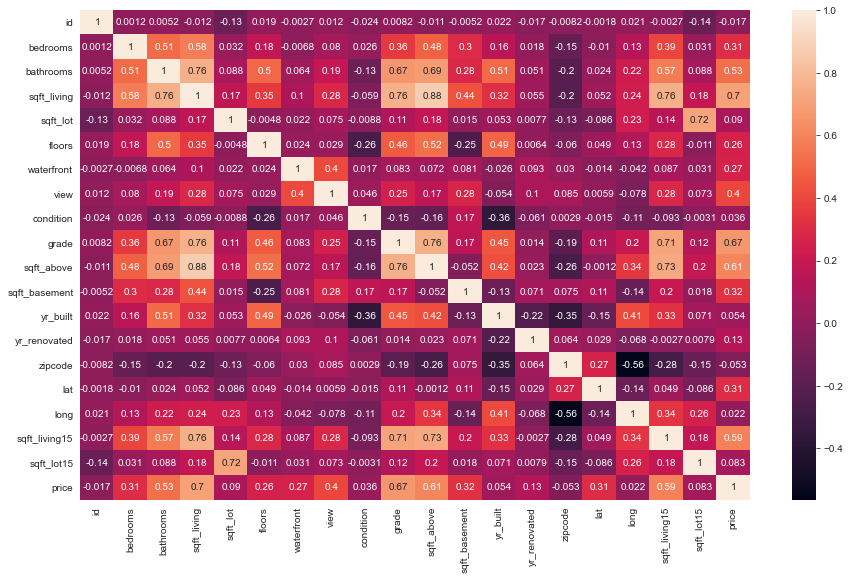

In [18]:
#building the correlation matrix

corr_matrix=df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15, 9))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

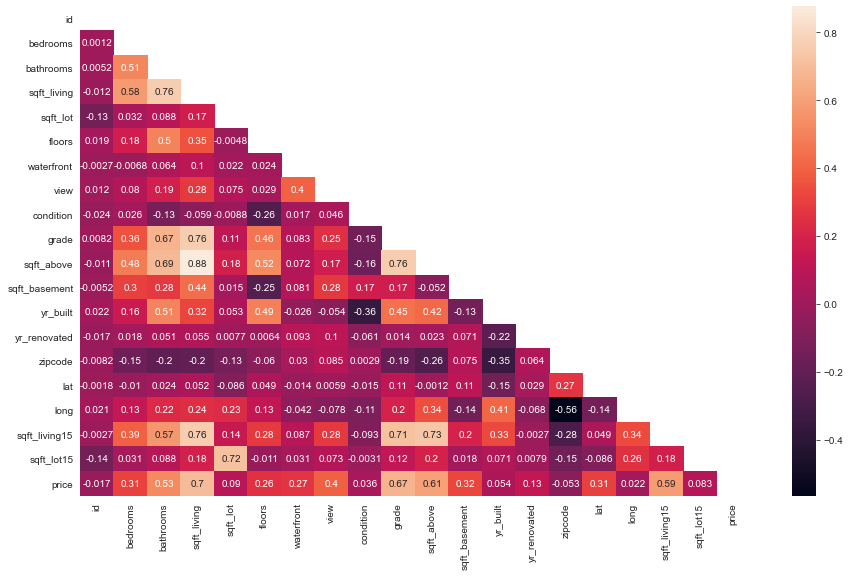

In [19]:
#another way to visualize it

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 9))
ax = sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.show()

In [20]:
corr_matrix.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In order to choose which feature to choose I'm visually checking the correlation among those feature with an high correlation and investigating further calcuating the VIF coefficient.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


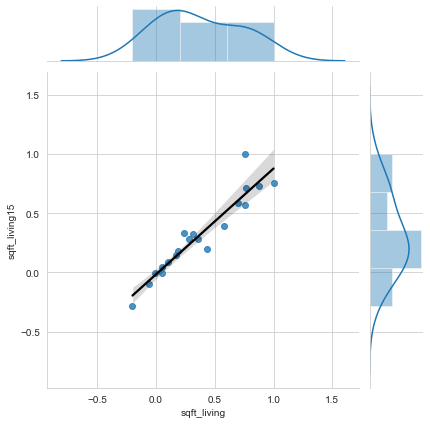

In [21]:
sns.jointplot(x="sqft_living", y="sqft_living15", data=corr_matrix, kind='reg',joint_kws={'line_kws':{'color':'black'}});

In [24]:
model = LinearRegression().fit(corr_matrix[['sqft_living']], corr_matrix[['sqft_living15']])
model_r2 = model.score(corr_matrix[['sqft_living']], corr_matrix[['sqft_living15']])
model_vif = 1/(1-model_r2)
print("The R2 of the model is: %5.3f" % (model_r2))
print("The VIF of the model is: %5.3f" % (model_vif))

The R2 of the model is: 0.893
The VIF of the model is: 9.342


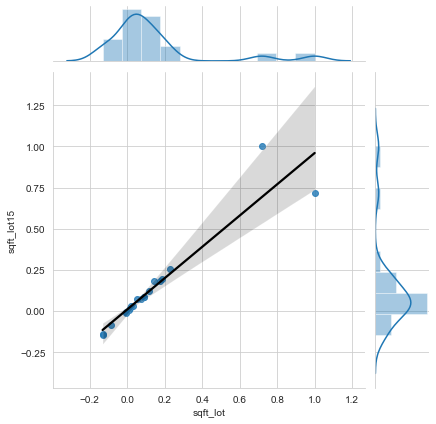

In [22]:
sns.jointplot(x="sqft_lot", y="sqft_lot15", data=corr_matrix, kind='reg',joint_kws={'line_kws':{'color':'black'}});

In [25]:
model = LinearRegression().fit(corr_matrix[['sqft_lot']], corr_matrix[['sqft_lot15']])
model_r2 = model.score(corr_matrix[['sqft_lot']], corr_matrix[['sqft_lot15']])
model_vif = 1/(1-model_r2)
print("The R2 of the model is: %5.3f" % (model_r2))
print("The VIF of the model is: %5.3f" % (model_vif))

The R2 of the model is: 0.889
The VIF of the model is: 8.976


Now I look closer at which feature is correlating with my dependent variable: price

# Choosing the features

In [27]:
correln = data.corr(method='pearson')[['price']].sort_values(by = 'price',ascending = False)

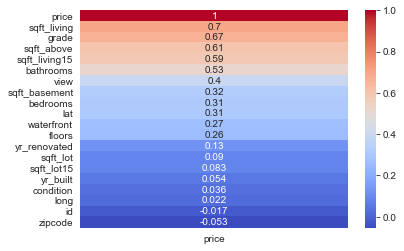

In [28]:
sns.heatmap(correln, annot = True, cmap = 'coolwarm');

In [26]:
df.drop(['id', 'sqft_living', 'sqft_lot'], axis=1, inplace=True)

## 2nd and 3rd iterations are carried out with these variables

In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
Y = df['price']
X = df[['sqft_above', 'sqft_living15','bathrooms','view', 'sqft_basement', 'floors', 'grade', 'condition', 'yr_built', 'yr_renovated', 'floors']]
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     3688.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:06:37   Log-Likelihood:            -2.9663e+05
No. Observations:               21597   AIC:                         5.933e+05
Df Residuals:                   21586   BIC:                         5.934e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.972e+06   1.42e+05     41.973

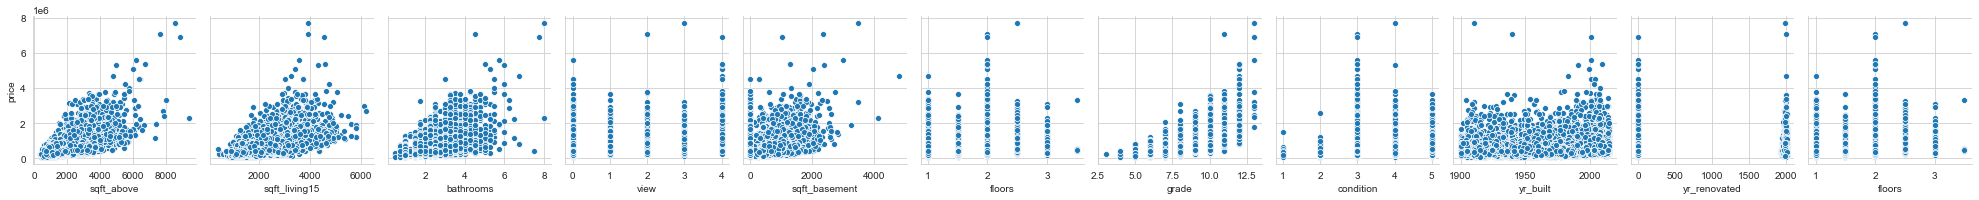

In [30]:
#These are the independent variables that I chose
sns.pairplot(data = df, x_vars = ['sqft_above', 'sqft_living15','bathrooms','view', 'sqft_basement', 'floors', 'grade', 'condition', 'yr_built', 'yr_renovated', 'floors'], y_vars = 'price');

In [31]:
df_1 = df[['sqft_above', 'sqft_living15','bathrooms','view', 'sqft_basement', 'floors', 'grade', 'condition', 'yr_built', 'yr_renovated', 'floors', 'price']]
df_1

,sqft_above,sqft_living15,bathrooms,view,sqft_basement,floors,grade,condition,yr_built,yr_renovated,floors,price
7316,1450,1260,1.00,0,0,1.0,7,4,1954,0,1.0,435000
20586,3310,2380,2.50,0,0,2.0,8,3,2012,0,2.0,555000
1040,1140,2200,2.50,0,800,1.0,7,4,1976,0,1.0,550000
20543,1280,1590,2.50,0,350,2.0,7,3,2009,0,2.0,295000
9587,1700,2380,2.50,0,900,1.0,9,4,1951,0,1.0,790000
...,...,...,...,...,...,...,...,...,...,...,...,...
19381,1380,1810,1.75,1,600,1.0,8,4,1960,0,1.0,725000
12623,1410,2950,2.00,0,0,1.0,7,4,1985,0,1.0,335000
5632,1870,1870,2.00,0,0,1.5,7,3,1960,0,1.5,450000
13040,720,920,1.75,0,670,1.0,6,3,1941,0,1.0,445500


In [32]:
#df_1.to_csv(r'/Users/claudia/Ironhack/Mid-Bootcamp Project/Linear_Regression_MidBootCampProject-/df_2nd_iter.csv')

## 4th Iteration: independet variables

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
Y = data['price']
X = data[['sqft_living','sqft_above','bathrooms','view','grade', 'yr_built', 'yr_renovated']]
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     5220.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:06:40   Log-Likelihood:            -2.9669e+05
No. Observations:               21597   AIC:                         5.934e+05
Df Residuals:                   21589   BIC:                         5.935e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          6.14e+06    1.3e+05     47.077   

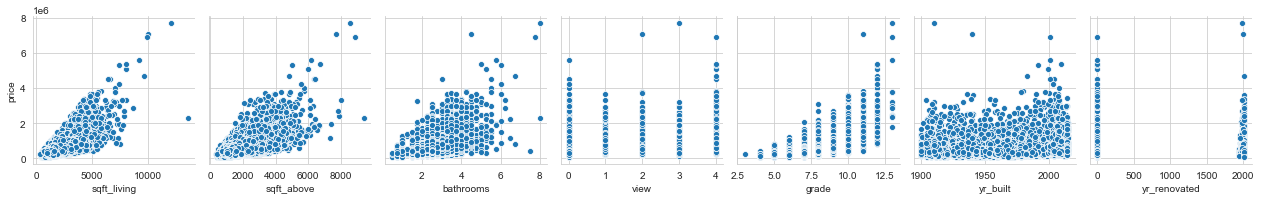

In [34]:
sns.pairplot(data = data, x_vars = ['sqft_living','sqft_above','bathrooms','view','grade', 'yr_built', 'yr_renovated'], y_vars = 'price');

For this iteration al will turn only view yr_built and renovated as dummy

In [35]:
df_2 = pd.DataFrame(data[['sqft_living','sqft_above','bathrooms','view','grade', 'yr_built', 'yr_renovated','price']])

In [36]:
df_2

,sqft_living,sqft_above,bathrooms,view,grade,yr_built,yr_renovated,price
0,1180,1180,1.00,0,7,1955,0,221900
1,2570,2170,2.25,0,7,1951,1991,538000
2,770,770,1.00,0,6,1933,0,180000
3,1960,1050,3.00,0,7,1965,0,604000
4,1680,1680,2.00,0,8,1987,0,510000
...,...,...,...,...,...,...,...,...
21592,1530,1530,2.50,0,8,2009,0,360000
21593,2310,2310,2.50,0,8,2014,0,400000
21594,1020,1020,0.75,0,7,2009,0,402101
21595,1600,1600,2.50,0,8,2004,0,400000


In [37]:
#df_2.to_csv(r'/Users/claudia/Ironhack/Mid-Bootcamp Project/Linear_Regression_MidBootCampProject-/df_4th_iter.csv')

## 5th iteration: independent variables

In [41]:
Y = data['price']
X = data[['sqft_living','sqft_above','bathrooms','view','grade']]
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     5870.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:09:21   Log-Likelihood:            -2.9812e+05
No. Observations:               21597   AIC:                         5.963e+05
Df Residuals:                   21591   BIC:                         5.963e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.792e+05   1.32e+04    -43.879      

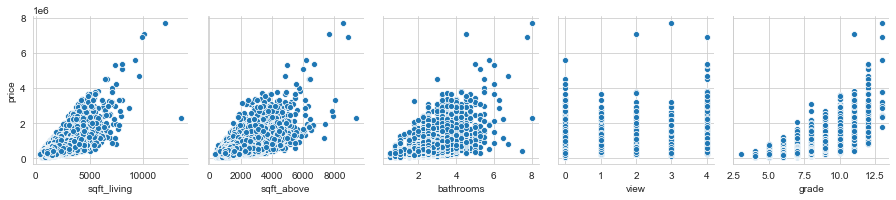

In [42]:
sns.pairplot(data = data, x_vars = ['sqft_living','sqft_above','bathrooms','view','grade'], y_vars = 'price');

In [44]:
df_2 = pd.DataFrame(data[['sqft_living','sqft_above','bathrooms','view','grade','price']])

In [45]:
df_2.to_csv(r'/Users/claudia/Ironhack/Mid-Bootcamp Project/Linear_Regression_MidBootCampProject-/df_5th_iter.csv')